# Визуализация для предобработки

## Гистограмма

Гистограмма показывает распределение данных. С помощью нее можно увидеть, как распределены данные, есть ли выбросы.  
Загрузим данные:

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [3]:
vis_data.keys()


Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

Один из начальных этапов работы с данных - визуализация и поиск проблем, которые можно решить. О визуализации в целом мы поговорим позже, здесь мы обсудим применение в контексте предобработки.  
Многие алгоритмы работают лучше, когда на вход принимают данные, распределенные нормально.  
Посмотрим на гистограмму какого-нибудь из признаков. Для удобства оставим только значения больше 0.  
**Совет** - на деле удаление из рассмотрения значений меньше 0 является не удобством, а необходимостью. Например, если признак обозначает выплату зарплаты, он не может быть меньше 0; тогда любые значения меньше 0 являются выбросами, мы поговорим о них чуть позже. 

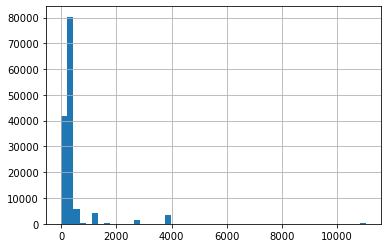

In [7]:
vis_data.balance_due[vis_data.balance_due > 0].hist(bins=50);

Одним из способов сделать данные более "нормальными" является взятие логарифма.  
При этом, не должно быть значений, равных 0, иначе метод `np.log` выдаст $-\infty$.

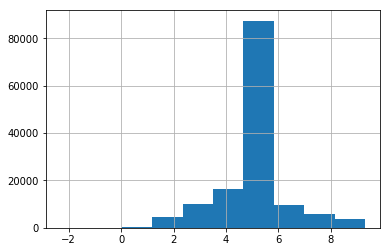

In [6]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Другим способом является взятие квадратного корня от данных:

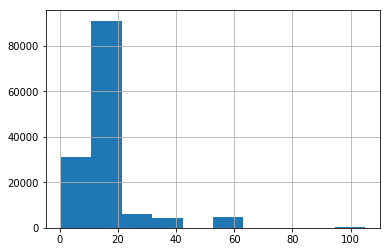

In [7]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Выше мы явно отсекли значения в данных, равные `0`. Если значения все-таки начинаются с `0`, перед взятием логарифма можно прибавить `1` к данным. Логарифм от `1` превратится в `0`.

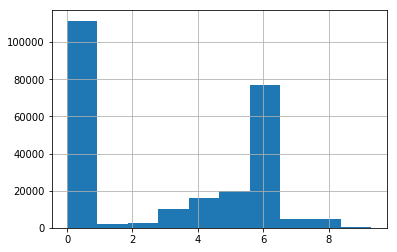

In [8]:
np.log(vis_data.balance_due[vis_data.balance_due >= 0] + 1).hist();

## Correlation plot

Некоторые признаки сильно скоррелированы друг с другом. Это значит, между этими признаками есть некоторая линейная зависимость. Если зависимость большая - часть скоррелированных признаков (не все) следует убрать из выборки, так как они несут избыточную информацию.  
При этом, отсутствие корреляции не означает отсутствие зависимости - между признаками в таком случае может быть сложная нелинейная зависимость.  
Для определения такой зависимости, можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.  
На главной диагонали этой матрицы будут стоять единицы, потому что для признака считается корреляция с самим собой.

In [13]:
import seaborn as sns

In [19]:
corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
admin_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


In [23]:
corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number', 'admin_fee', 'judgment_amount', 'late_fee'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,state_fee,discount_amount,balance_due
ticket_id,1.00,-0.04,-0.02,0.00
state_fee,-0.04,1.00,0.03,0.28
discount_amount,-0.02,0.03,1.00,-0.02
balance_due,0.00,0.28,-0.02,1.00
